<a href="https://colab.research.google.com/github/yash-1994/Seoul-Bike-ML-Model-Fcc-Learning-2/blob/main/Seoul_Bike_ML_Model_Fcc_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [96]:
url = 'https://raw.githubusercontent.com/yash-1994/Seoul-Bike-ML-Model-Fcc-Learning-2/main/SeoulBikeData.csv'

data = pd.read_csv(url,encoding='ISO-8859-1')

In [97]:
data.columns
data = data.drop(["Holiday","Seasons","Date","Hour"],axis=1)

In [98]:
data.columns = [
    "bike_count", "temp", "humidity", "wind", "visibility",
    "dew_pt_temp", "radiation", "rain", "snow", "functional"
]
data["functional"] = (data["functional"] == "Yes").astype(int)
data.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


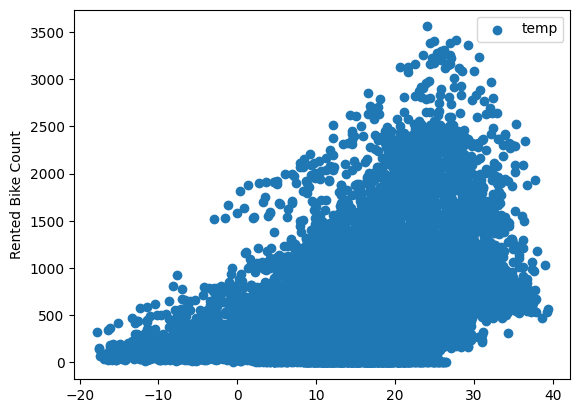

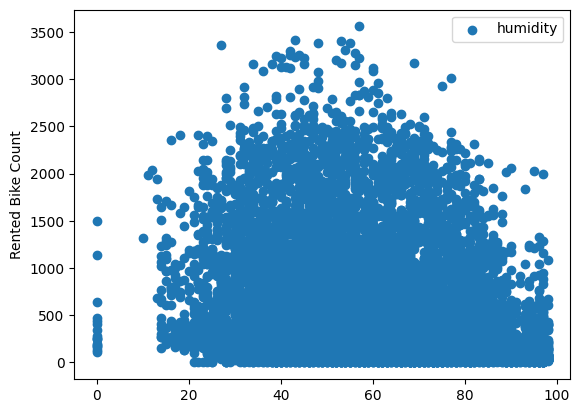

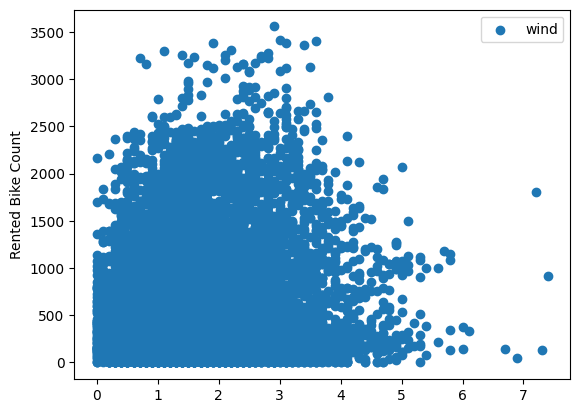

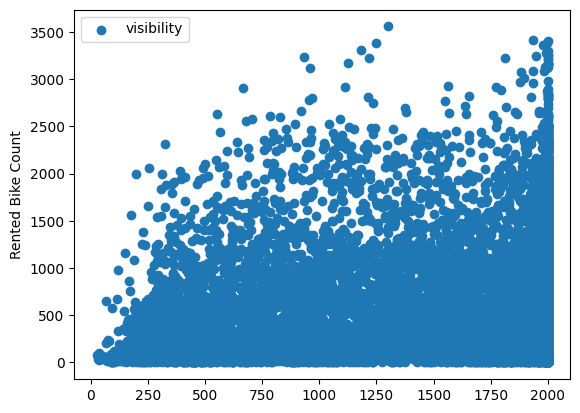

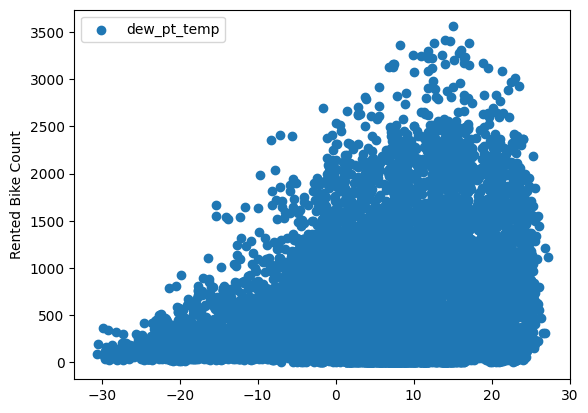

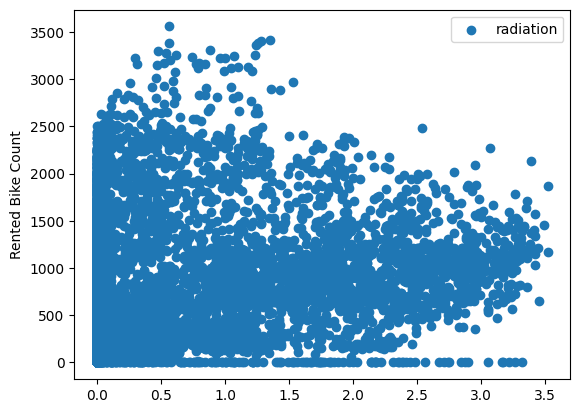

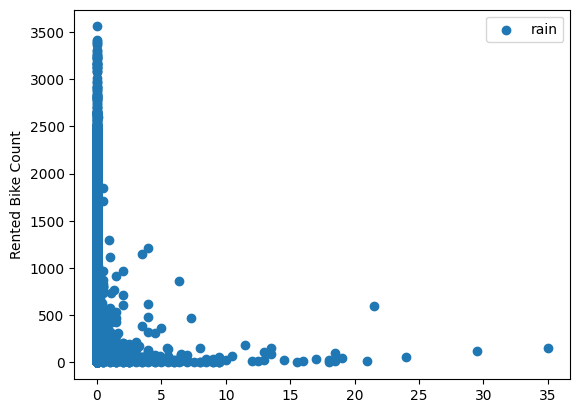

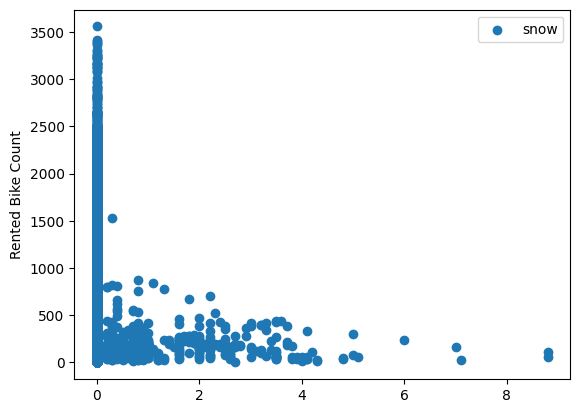

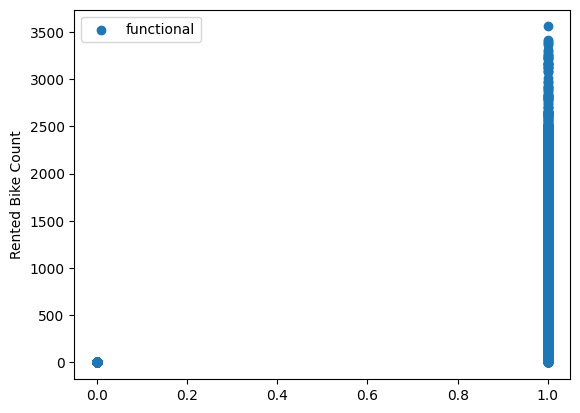

In [99]:
for label in data.columns[1:]:
  plt.scatter(data[label],data["bike_count"],label=label)
  plt.legend()
  plt.ylabel("Rented Bike Count")
  plt.show()
  print()

In [100]:
data = data.drop(["visibility","wind","functional"],axis=1)

# Traning Testing Validation Split


In [101]:
train_data,valid_data,test_data = np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [114]:
# Data set function

def get_XY(data_frame,x_label=None,y_label=None):
  df = copy.deepcopy(data_frame)
  if not x_label:
    print("nothign for the x label")
    X = df[[c for c in df.columns if c != y_label]].values
  elif len(x_label) == 1:
    X = df[x_label[0]].values.reshape(-1,1)
  else:
    X = df[x_label].values
  Y = df[y_label].values.reshape(-1,1)
  data = np.hstack([X,Y])
  return data,X[:100],Y[:100]

In [134]:
def plot_loss(history):
  plt.plot(history.history['loss'],label="Loss")
  plt.plot(history.history['val_loss'],label="Val Loss")
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [116]:
_,x_train_temp,y_train_temp = get_XY(train_data,["temp"],"bike_count")
_,x_valid_temp,y_valid_temp = get_XY(valid_data,["temp"],"bike_count")
_,x_test_temp,y_test_temp = get_XY(test_data,["temp"],"bike_count")

In [117]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)
temp_reg.coef_,temp_reg.intercept_

(array([[32.91068602]]), array([360.59392131]))

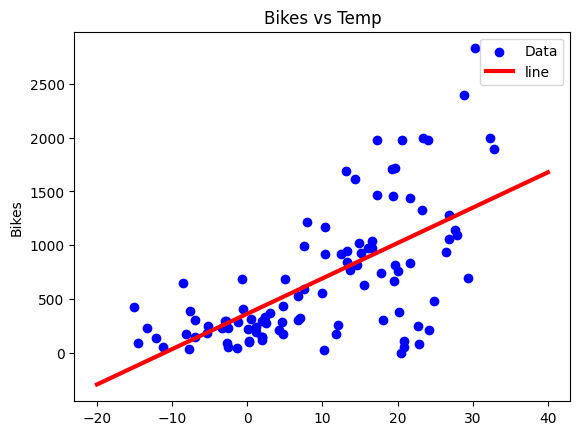

In [118]:
plt.scatter(x_train_temp,y_train_temp, label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="line",color="red",linewidth=3)
plt.ylabel("Bikes")
plt.title("Bikes vs Temp")
plt.legend()
plt.show()

# Multiple Linear Regression

In [119]:
_,x_train_all,y_train_all = get_XY(train_data,y_label="bike_count")
_,x_valid_all,y_valid_all = get_XY(valid_data,y_label="bike_count")
_,x_test_all,y_test_all = get_XY(test_data,y_label="bike_count")

nothign for the x label
nothign for the x label
nothign for the x label


In [120]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [121]:
all_reg.score(x_test_all,y_test_all)

0.17125109455105259

# Regression with Neural Network

In [122]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [124]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [125]:
history = temp_nn_model.fit(x_train_temp.reshape(-1),y_train_temp,verbose=0,epochs=1000,validation_data=(x_valid_temp,y_valid_temp))

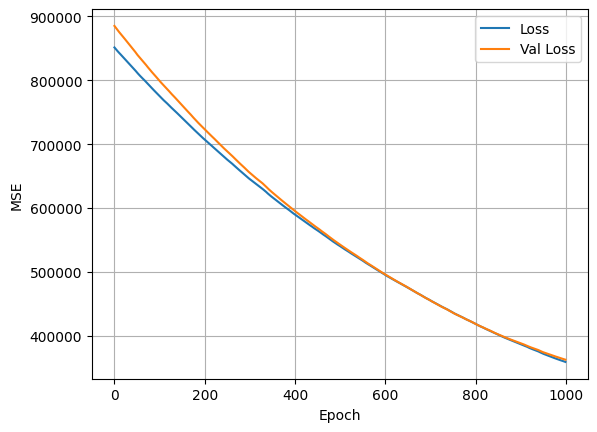

In [135]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


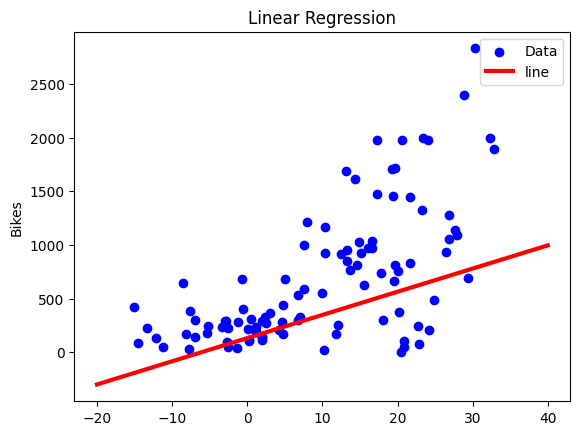

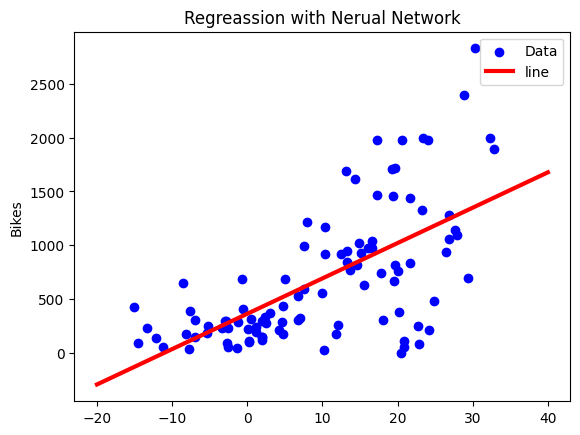

In [139]:
plt.scatter(x_train_temp,y_train_temp, label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="line",color="red",linewidth=3)
plt.ylabel("Bikes")
plt.title("Linear Regression")
plt.legend()
plt.show()

print("")

plt.scatter(x_train_temp,y_train_temp, label="Data",color="blue")
x = tf.linsMpace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="line",color="red",linewidth=3)
plt.ylabel("Bikes")
plt.title("Regreassion with Nerual Network")
plt.legend()
plt.show()

# Nueal Network

In [176]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [177]:
history = nn_model.fit(
    x_train_temp,
    y_train_temp,
    validation_data=(x_valid_temp, y_valid_temp),  # Ensure validation input is also reshaped correctly
    verbose=0,
    epochs=100
)

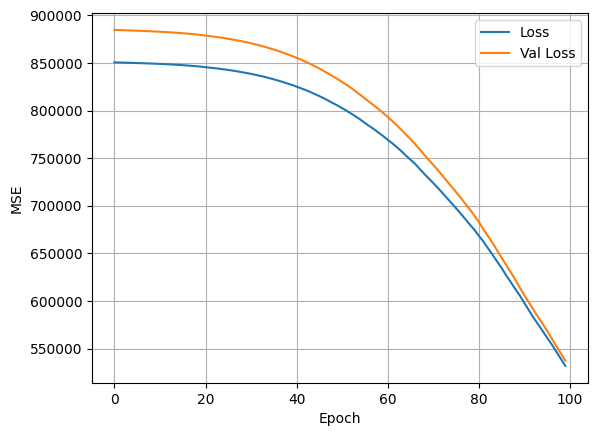

In [178]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


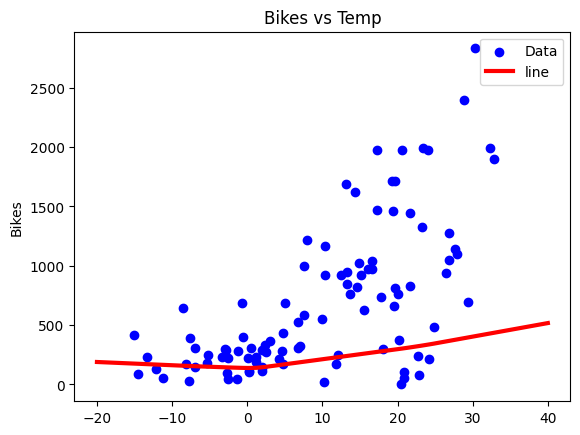

In [179]:
plt.scatter(x_train_temp,y_train_temp, label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="line",color="red",linewidth=3)
plt.ylabel("Bikes")
plt.title("Bikes vs Temp")
plt.legend()
plt.show()